In [1]:
import os,sys,json
import core.nsf_utils, core.openaire_utils

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

In [2]:
data = {}
years = [2009, 2010, 2011, 2012]
for y in years:
    data.update(core.nsf_utils.load_numpub_data(y))
grant_type = ["Standard Grant", "Continuing grant"] # draw only these types
div_type = [
"Directorate for Mathematical &amp; Physical Scien",
# "Directorate for Social, Behav &amp; Economic Scie",
# "Directorate for Education and Human Resource",
"Directorate for Computer &amp; Info Scie &amp; Enginr",
# "Directorate for Geosciences",
"Directorate for Engineering",
"Directorate for Biological Sciences"
]

Directorate for Mathematical &amp; Physical Scien 
			num_pub mean=10.97, std=18.81, median=6.00
Directorate for Computer &amp; Info Scie &amp; Enginr 
			num_pub mean=6.01, std=10.19, median=2.00
Directorate for Engineering 
			num_pub mean=5.30, std=9.73, median=2.00
Directorate for Biological Sciences 
			num_pub mean=8.20, std=16.23, median=4.00


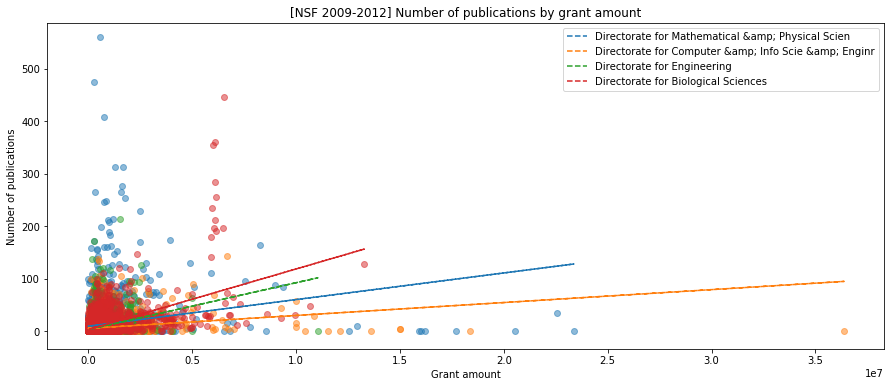

In [3]:
plt.figure(figsize=(15,6))
plt.title("[NSF {}-{}] Number of publications by grant amount".format(years[0], years[-1]))
plt.ylabel("Number of publications")
plt.xlabel("Grant amount")
for divt in div_type:
    x = [d["amount"] for d in data.values() if d["type"] in grant_type and d["div"] == divt]
    y = [d["num_pubs"] for d in data.values() if d["type"] in grant_type and d["div"] == divt]
    plt.scatter(x, y, alpha=0.5)
    z = np.polyfit(x, y, 1) # calc the trendline
    p = np.poly1d(z)
    plt.plot(x, p(x),"--")
    print(divt, "\n\t\t\tnum_pub mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(y), np.std(y), np.median(y)))
plt.legend(div_type, bbox_to_anchor=(1, 1))

Standard Grant 
			num_pub mean=4.68, std=8.06, median=2.00
Continuing grant 
			num_pub mean=8.54, std=12.09, median=5.00


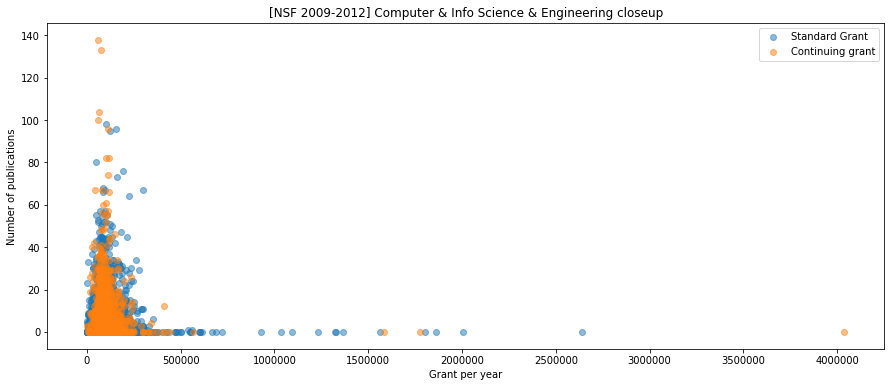

In [4]:
plt.figure(figsize=(15,6))
plt.title("[NSF {}-{}] Computer & Info Science & Engineering closeup".format(years[0], years[-1]))
plt.ylabel("Number of publications")
plt.xlabel("Grant per year")
divt = "Directorate for Computer &amp; Info Scie &amp; Enginr"
for gtype in grant_type:
    x = [d["amount"]/(max(1, d["duration"])/365) for d in data.values() 
         if d["type"] == gtype and d["div"] == divt and d["amount"] < 1000000]
    y = [d["num_pubs"] for d in data.values() 
         if d["type"] == gtype and d["div"] == divt and d["amount"] < 1000000]
    plt.scatter(x, y, alpha=0.5)
    print(gtype, "\n\t\t\tnum_pub mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(y), np.std(y), np.median(y)))
plt.legend(grant_type, bbox_to_anchor=(1, 1))

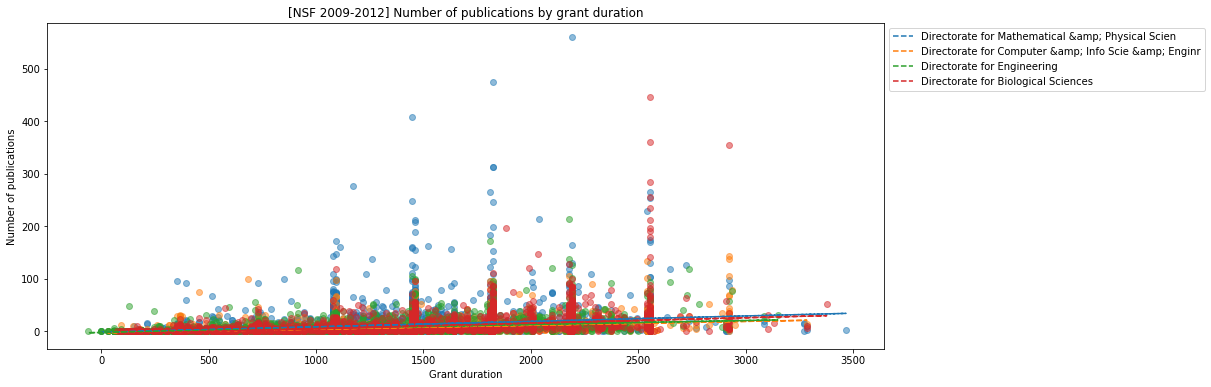

In [5]:
plt.figure(figsize=(15,6))
plt.title("[NSF {}-{}] Number of publications by grant duration".format(years[0], years[-1]))
plt.ylabel("Number of publications")
plt.xlabel("Grant duration")
for divt in div_type:
    x = [d["duration"] for d in data.values() if d["type"] in grant_type and d["div"] == divt]
    y = [d["num_pubs"] for d in data.values() if d["type"] in grant_type and d["div"] == divt]
    plt.scatter(x, y, alpha=0.5)
    z = np.polyfit(x, y, 1) # calc the trendline
    p = np.poly1d(z)
    plt.plot(x, p(x),"--")
plt.legend(div_type, bbox_to_anchor=(1, 1))

In [6]:
data = {}
years = range(2009, 2015)
for y in years:
    data.update(core.openaire_utils.load_numpub_data(y))
grant_type = {
    "DE": "DECRA",
    "DP": "Discovery Projects", 
    "LP": "Linkage Projects", 
    "FT": "Future Fellowships",
    "LE": "LIEF(Linkage Infrastructure, Equipment and Facilities)"
}# draw only these types

DE 
			num_pub mean=1.65, std=2.72, median=0.00
DP 
			num_pub mean=1.21, std=2.34, median=0.00
LP 
			num_pub mean=0.55, std=1.26, median=0.00
FT 
			num_pub mean=2.40, std=3.26, median=1.00
LE 
			num_pub mean=0.43, std=1.41, median=0.00


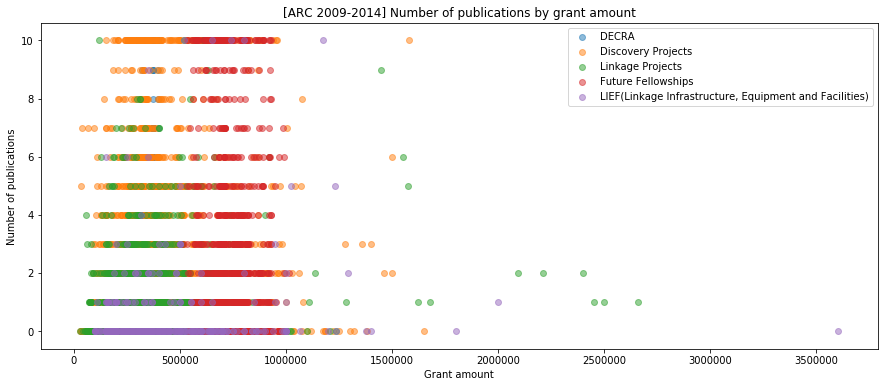

In [7]:
plt.figure(figsize=(15,6))
plt.title("[ARC {}-{}] Number of publications by grant amount".format(years[0], years[-1]))
plt.ylabel("Number of publications")
plt.xlabel("Grant amount")
for gtype in grant_type:
    x = [d["amount"] for d in data.values() if d["type"] == gtype]
    y = [d["num_pubs"] for d in data.values() if d["type"] == gtype]
    plt.scatter(x, y, alpha=0.5)
    print(gtype, "\n\t\t\tnum_pub mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(y), np.std(y), np.median(y)))
plt.legend(grant_type.values(), bbox_to_anchor=(1, 1))

DE 
			num_pub mean=1.65, std=2.72, median=0.00
FT 
			num_pub mean=2.40, std=3.26, median=1.00


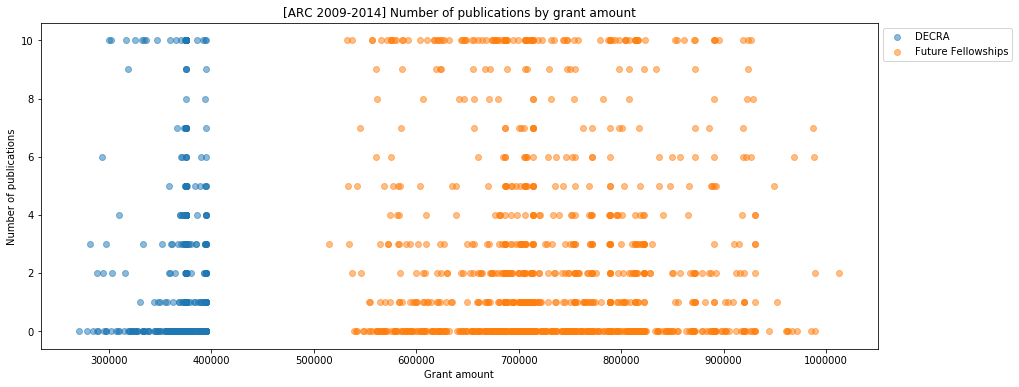

In [8]:
grant_type = {
    "DE": "DECRA",
    "FT": "Future Fellowships",
}# draw only these types
plt.figure(figsize=(15,6))
plt.title("[ARC {}-{}] Number of publications by grant amount".format(years[0], years[-1]))
plt.ylabel("Number of publications")
plt.xlabel("Grant amount")
for gtype in grant_type:
    x = [d["amount"] for d in data.values() if d["type"] == gtype]
    y = [d["num_pubs"] for d in data.values() if d["type"] == gtype]
    plt.scatter(x, y, alpha=0.5)
    print(gtype, "\n\t\t\tnum_pub mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(y), np.std(y), np.median(y)))
plt.legend(grant_type.values(), bbox_to_anchor=(1, 1))

MATHEMATICAL SCIENCES 
			num_pub mean=4.47, std=4.02, median=3.00
PHYSICAL SCIENCES 
			num_pub mean=4.41, std=3.96, median=3.00
CHEMICAL SCIENCES 
			num_pub mean=0.72, std=1.50, median=0.00
BIOLOGICAL SCIENCES 
			num_pub mean=1.42, std=1.87, median=1.00
INFORMATION AND COMPUTING SCIENCES 
			num_pub mean=1.64, std=2.77, median=0.00


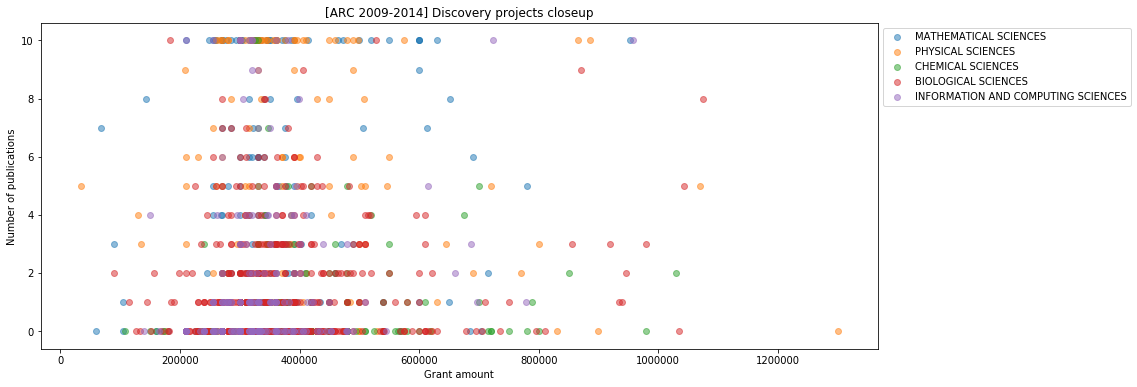

In [9]:
mdiv = {
    "01": "MATHEMATICAL SCIENCES", 
    "02": "PHYSICAL SCIENCES",
    "03": "CHEMICAL SCIENCES",
#     "04": "EARTH SCIENCES",
#     "05": "ENVIRONMENTAL SCIENCES",
    "06": "BIOLOGICAL SCIENCES", 
#     "07": "AGRICULTURAL AND VETERINARY SCIENCES",
    "08": "INFORMATION AND COMPUTING SCIENCES", 
#     "09": "ENGINEERING",
#     "10": "TECHNOLOGY",
#     "11": "MEDICAL AND HEALTH SCIENCES",
#     "12": "BUILT ENVIRONMENT AND DESIGN",
#     "13": "EDUCATION",
#     "14": "ECONOMICS",
#     "15": "COMMERCE, MANAGEMENT, TOURISM AND SERVICES",
#     "16": "STUDIES IN HUMAN SOCIETY",
#     "17": "PSYCHOLOGY AND COGNITIVE SCIENCES",
#     "18": "LAW AND LEGAL STUDIES",
#     "19": "STUDIES IN CREATIVE ARTS AND WRITING",
#     "20": "LANGUAGE, COMMUNICATION AND CULTURE",
#     "21": "HISTORY AND ARCHAEOLOGY",
#     "22": "PHILOSOPHY AND RELIGIOUS STUDIES"
}
plt.figure(figsize=(15,6))
plt.title("[ARC {}-{}] Discovery projects closeup".format(years[0], years[-1]))
plt.ylabel("Number of publications")
plt.xlabel("Grant amount")
gtype = "DP"
for divt in mdiv:
    x = [d["amount"] for d in data.values() if d["type"] == gtype and d["div"] == divt]
    y = [d["num_pubs"] for d in data.values() if d["type"] == gtype and d["div"] == divt]
    plt.scatter(x, y, alpha=0.5)
    print(mdiv[divt], "\n\t\t\tnum_pub mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(y), np.std(y), np.median(y)))
plt.legend(mdiv.values(), bbox_to_anchor=(1, 1))

MATHEMATICAL SCIENCES 
			num_pub mean=1.14, std=1.55, median=0.00
PHYSICAL SCIENCES 
			num_pub mean=0.74, std=1.18, median=0.00
CHEMICAL SCIENCES 
			num_pub mean=0.43, std=1.04, median=0.00
BIOLOGICAL SCIENCES 
			num_pub mean=1.38, std=1.94, median=1.00
INFORMATION AND COMPUTING SCIENCES 
			num_pub mean=0.71, std=1.63, median=0.00


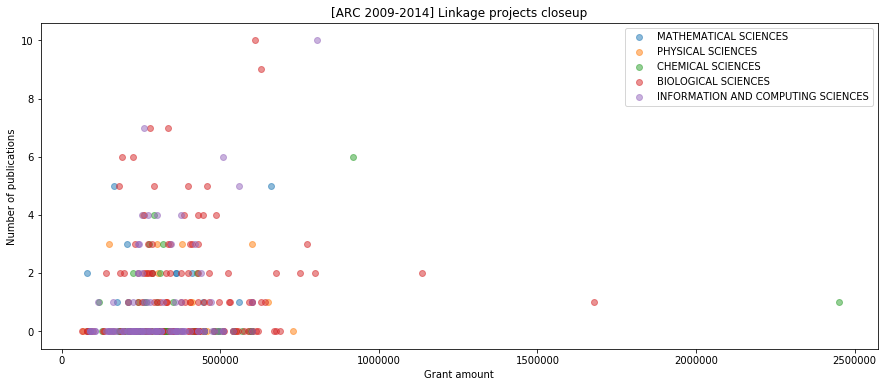

In [10]:
plt.figure(figsize=(15,6))
plt.title("[ARC {}-{}] Linkage projects closeup".format(years[0], years[-1]))
plt.ylabel("Number of publications")
plt.xlabel("Grant amount")
gtype = "LP"
for divt in mdiv:
    x = [d["amount"] for d in data.values() if d["type"] == gtype and d["div"] == divt]
    y = [d["num_pubs"] for d in data.values() if d["type"] == gtype and d["div"] == divt]
    plt.scatter(x, y, alpha=0.5)
    print(mdiv[divt], "\n\t\t\tnum_pub mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(y), np.std(y), np.median(y)))
plt.legend(mdiv.values(), bbox_to_anchor=(1, 1))